## Importing libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [4]:
data = pd.read_csv('xAPI-Edu-Data.csv')

## Data Exploration

In [5]:
data.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [7]:
data.sample()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
220,M,lebanon,lebanon,MiddleSchool,G-08,C,Spanish,S,Father,77,69,41,13,Yes,Good,Under-7,M


In [8]:
# Summary statistics
print(data.describe())

       raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000


In [9]:
# Check for missing values
print(data.isnull().sum())

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


## Feature Selection 

In [49]:
# distribution of categorical variables
categorical_cols = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 
                    'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
                    'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

In [14]:
# distribution of numerical variables
numeric_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

## EDA

/home/u213914/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


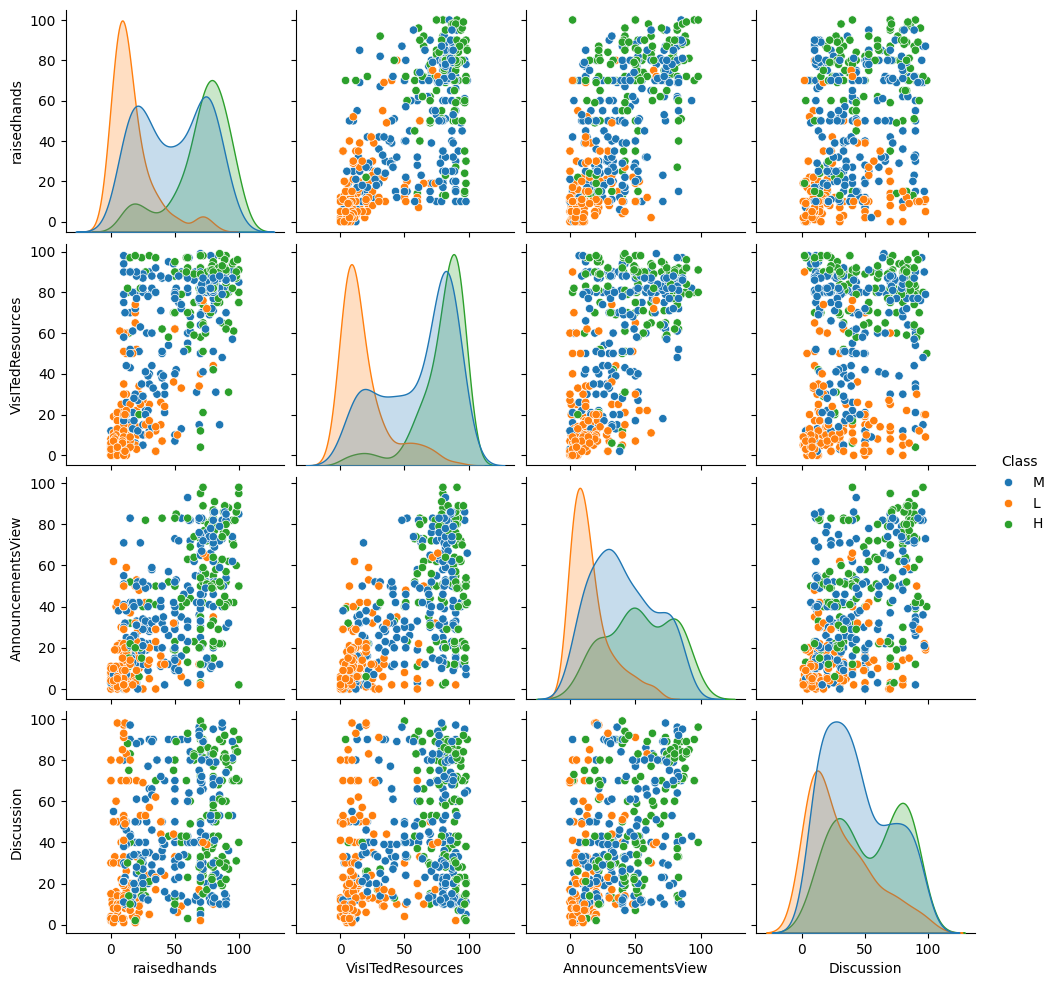

<Figure size 640x480 with 0 Axes>

In [15]:
# Visualize the distribution of numeric variables
sns.pairplot(data, hue='Class', vars=numeric_cols)
plt.show()
plt.tight_layout()

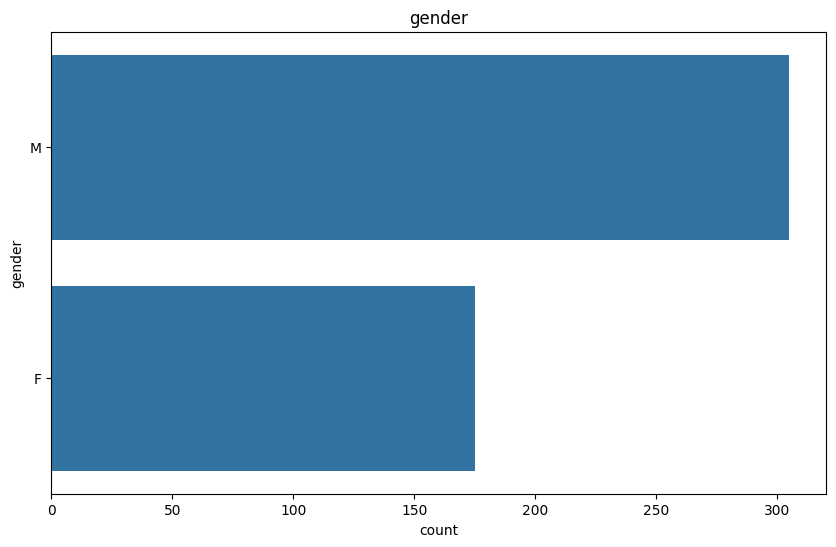

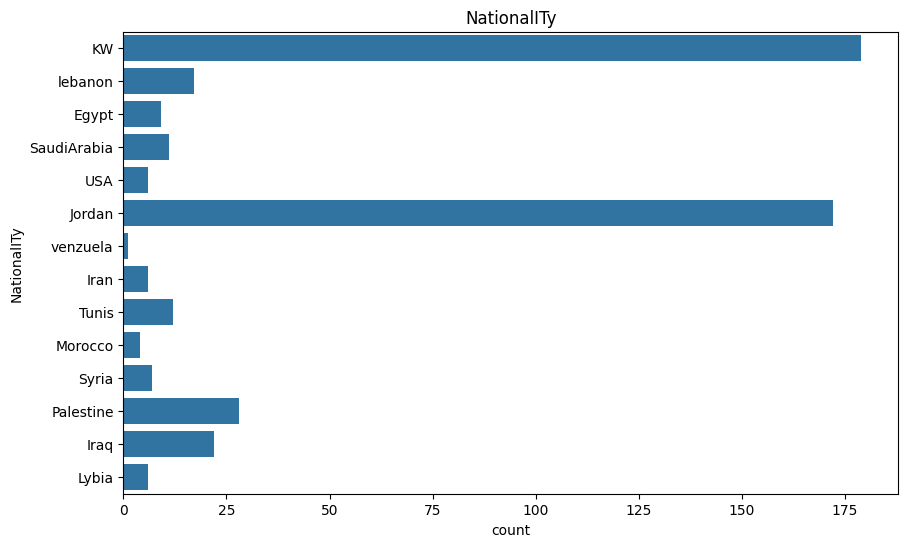

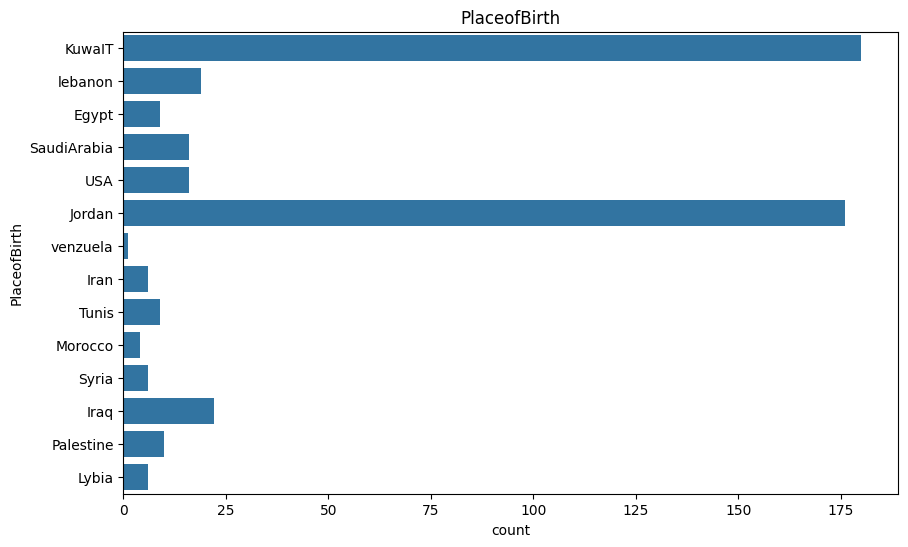

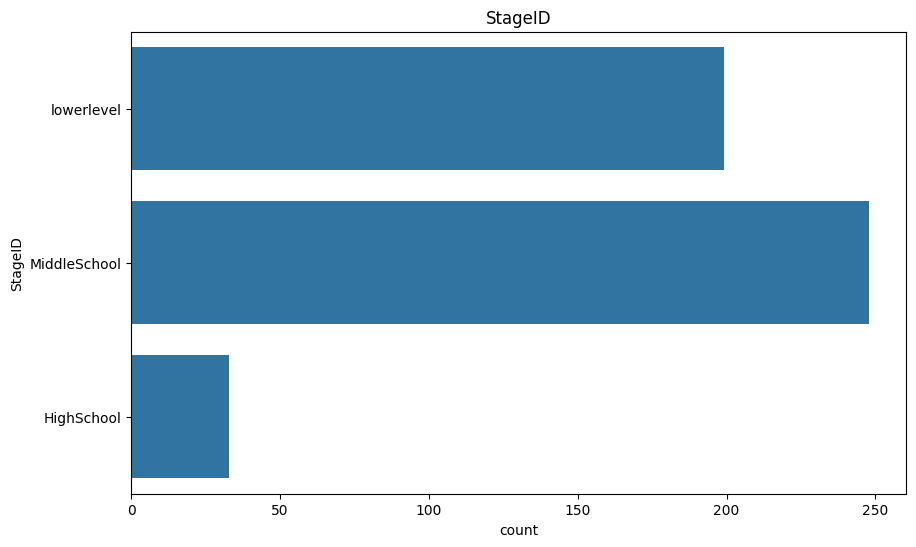

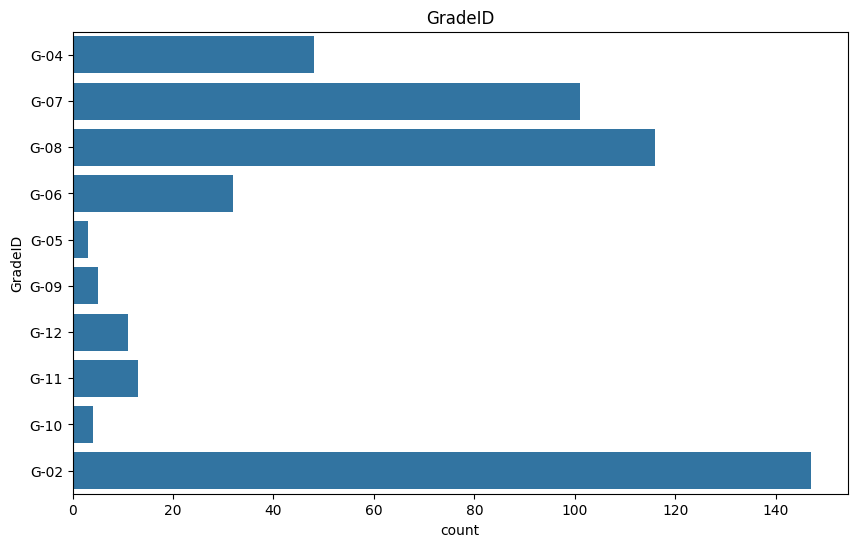

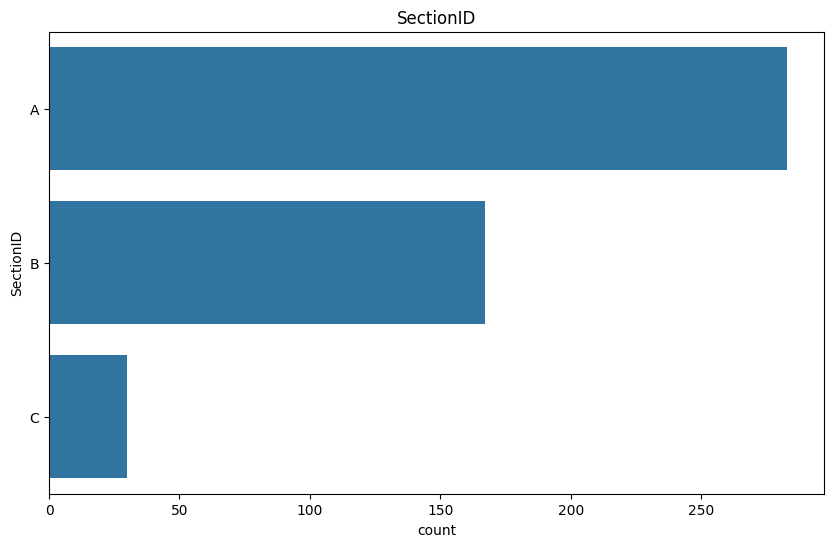

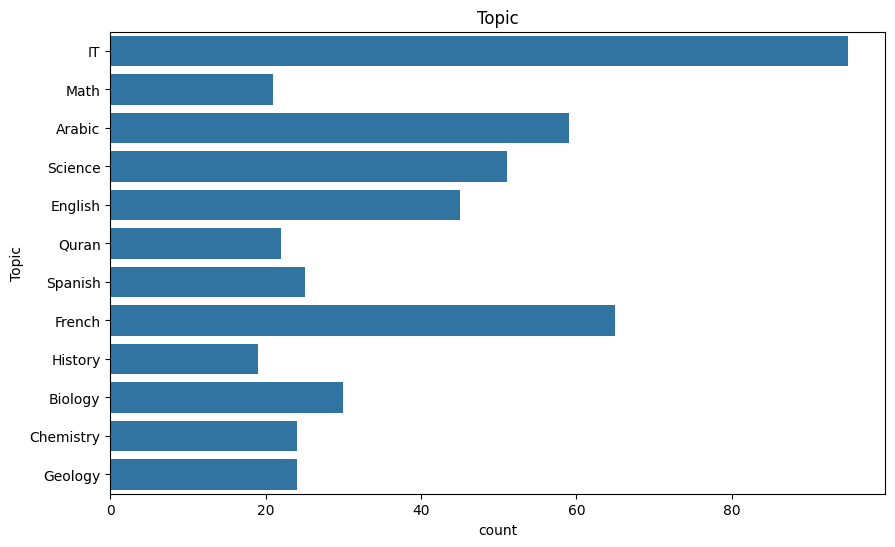

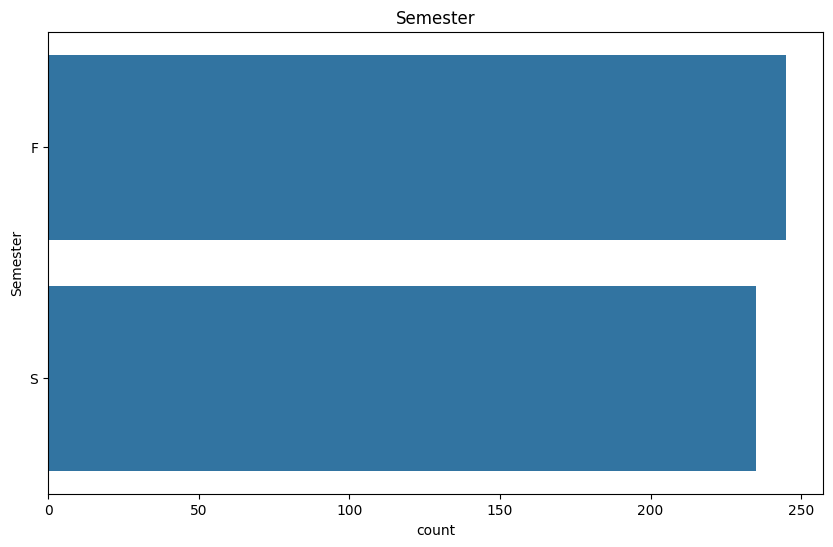

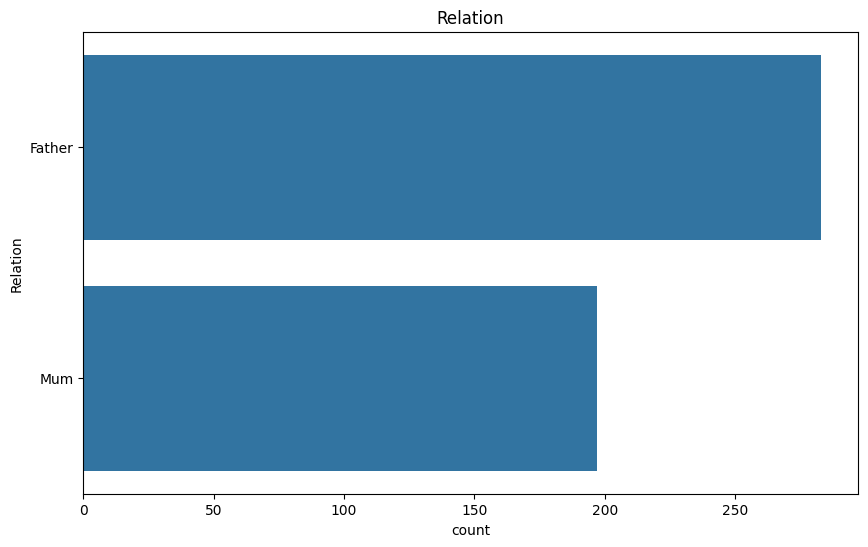

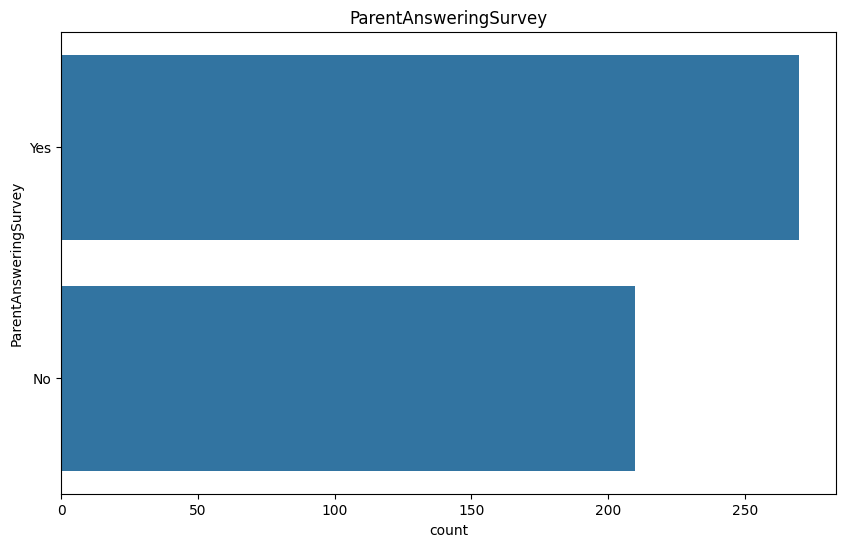

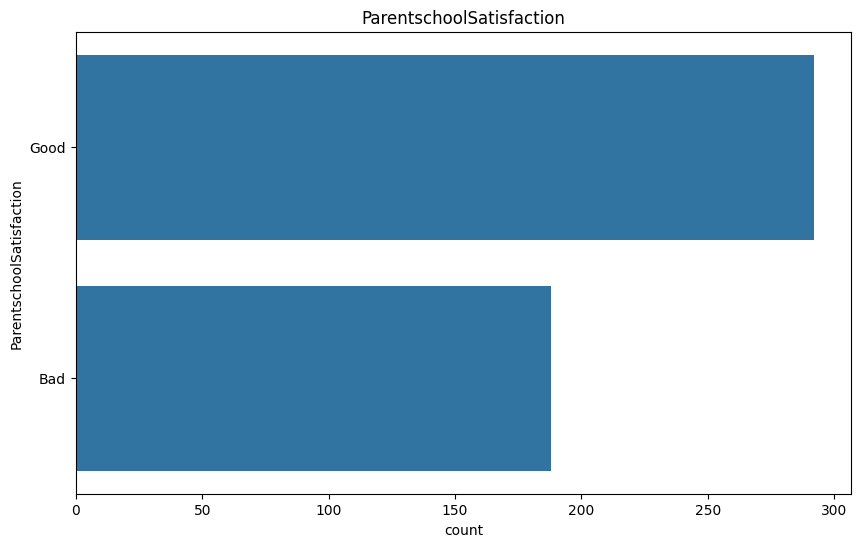

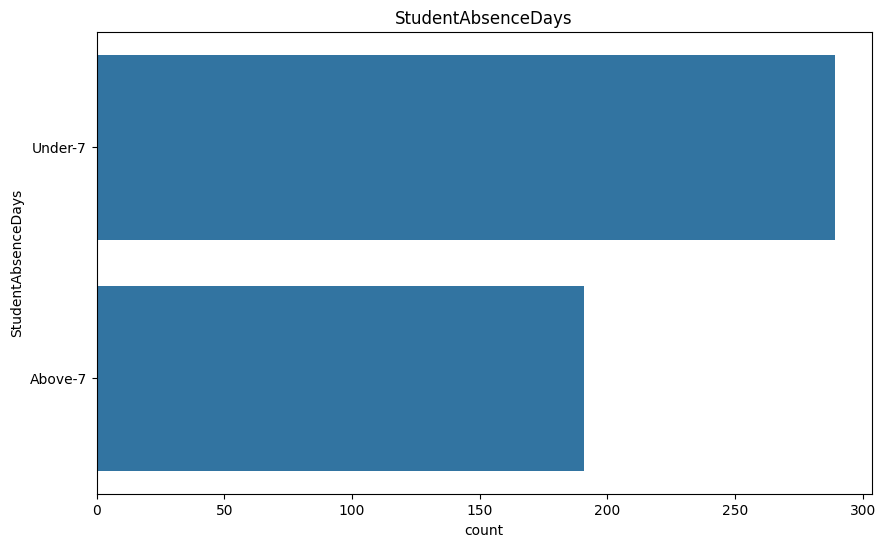

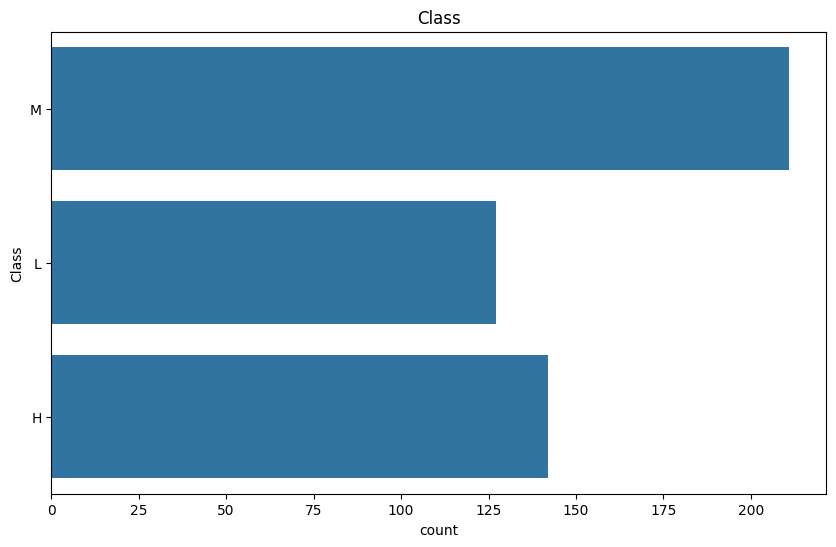

In [19]:
# Visualize the distribution of categorical variables
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col])
    plt.title(col)
    plt.show()

### Correlation matrix

Compute the correlation matrix between numeric variables and visualize it using a heatmap. This will help identify any significant correlations between variables.

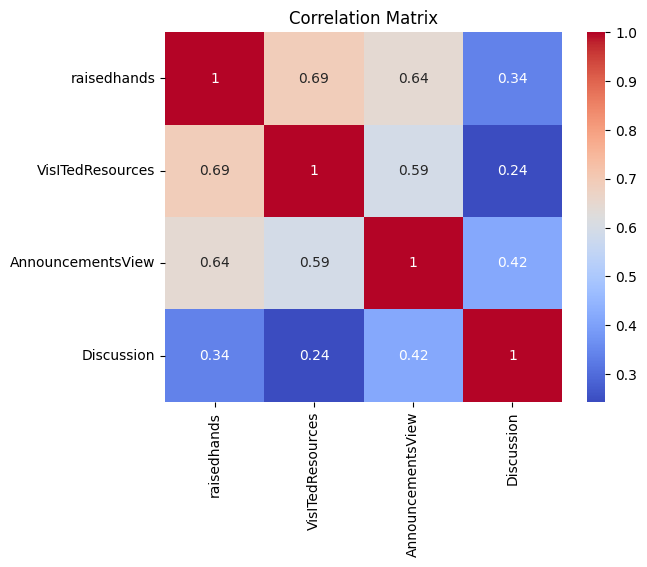

In [20]:
# Correlation matrix
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Cross-tabulation: 

Creating cross-tabulations between pairs of categorical variables to observe relationships between them.

In [28]:
# Example of cross-tabulation between 'NationalITy' and 'Class'
cross_tab = pd.crosstab(data['NationalITy'], data['Class'])
print(cross_tab)


Class         H   L   M
NationalITy            
Egypt         2   3   4
Iran          0   2   4
Iraq         14   0   8
Jordan       53  37  82
KW           36  68  75
Lybia         0   6   0
Morocco       1   1   2
Palestine    12   0  16
SaudiArabia   6   1   4
Syria         2   2   3
Tunis         3   4   5
USA           3   1   2
lebanon       9   2   6
venzuela      1   0   0


### ANOVA test

Using ANOVA test to compare numeric variables across different levels of categorical variables.

In [29]:
# Example of ANOVA test between 'raisedhands' and 'Class'
from scipy.stats import f_oneway

low_class = data[data['Class'] == 'L']['raisedhands']
medium_class = data[data['Class'] == 'M']['raisedhands']
high_class = data[data['Class'] == 'H']['raisedhands']

f_statistic, p_value = f_oneway(low_class, medium_class, high_class)
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)


ANOVA F-Statistic: 176.38907872911503
ANOVA p-value: 4.51020980899929e-58


## K means Clustering

### Elbow method

In [22]:
input_col=['raisedhands','VisITedResources','AnnouncementsView','Discussion']
X=data[input_col].values

In [23]:
# Initialize an empty list to store the within-cluster sum of squares
from sklearn.cluster import KMeans
wcss = []

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init='auto', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)# here inertia calculate sum of square distance in each cluster


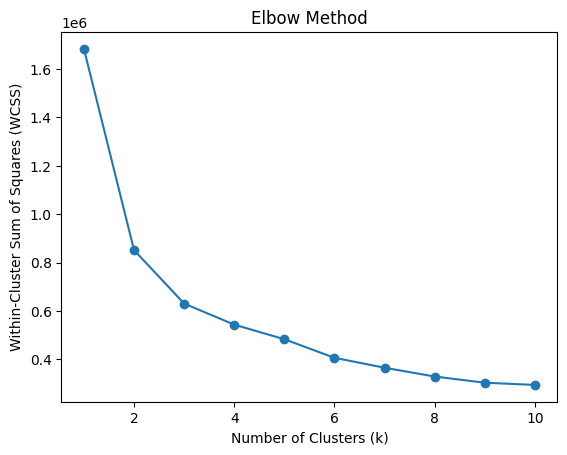

In [24]:
# Plot the within-cluster sum of squares for different values of k
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

## Using Silhouette Scores

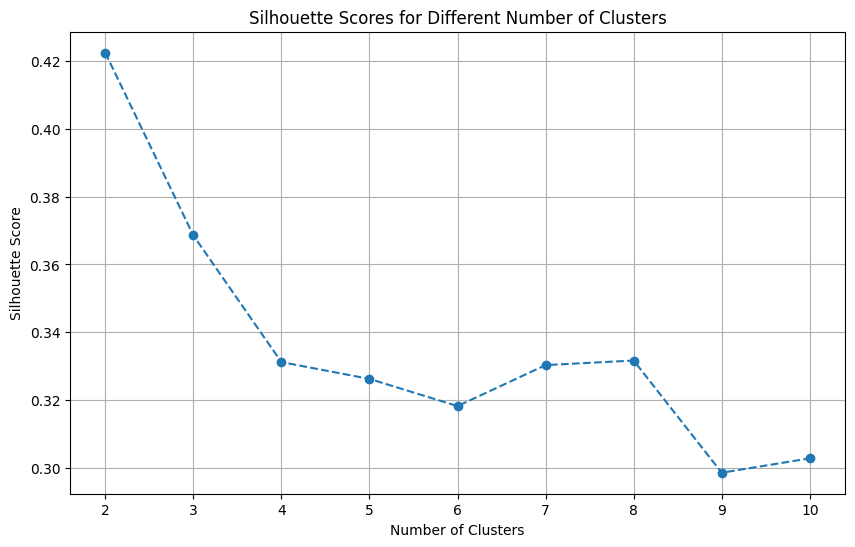

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Define a range of cluster numbers to evaluate
cluster_range = range(2, 11)  # You can adjust the range as needed

# Iterate over different numbers of clusters
for n_clusters in cluster_range:
    # Compute KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Compute the silhouette score for current number of clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


In [35]:
# Find the index of the maximum silhouette score
best_index = silhouette_scores.index(max(silhouette_scores))

# Get the best number of clusters
best_num_clusters = cluster_range[best_index]

print("Best Number of Clusters:", best_num_clusters)


Best Number of Clusters: 2


## Implementing K-means clustering

In [44]:
# Perform k-means clustering
k = 2 # Number of clusters
kmeans = KMeans(n_clusters=k,n_init='auto', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto', random_state=42)

## Extracting labels and cluster centers

In [45]:
# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
data['Cluster'] = labels


In [46]:
data.sample(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Cluster
380,F,Jordan,Jordan,lowerlevel,G-02,B,Arabic,F,Father,11,20,20,98,No,Bad,Above-7,L,0
185,M,lebanon,Jordan,MiddleSchool,G-08,A,Arabic,S,Mum,87,65,82,33,Yes,Good,Under-7,H,1
434,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,85,87,72,10,Yes,Good,Above-7,M,1
67,F,USA,USA,HighSchool,G-12,A,English,F,Mum,65,75,23,80,Yes,Good,Under-7,H,1
386,M,Jordan,Jordan,lowerlevel,G-02,B,Arabic,F,Mum,15,90,21,97,Yes,Good,Under-7,M,1


## Visualizing the clustering using first two features

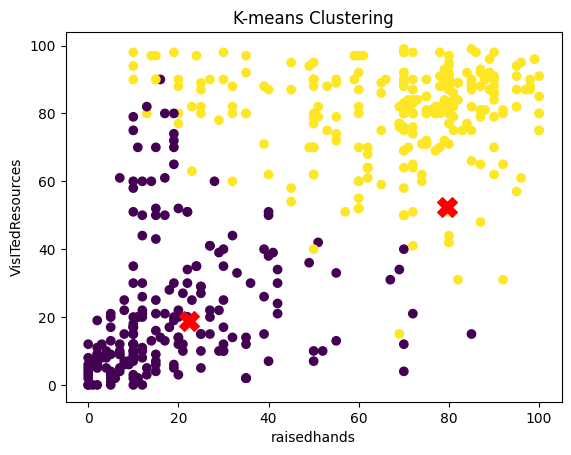

In [47]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:,1], centroids[:, 2], marker='X', s=200, c='red')
plt.xlabel(input_col[0])
plt.ylabel(input_col[1])
plt.title('K-means Clustering')
plt.show()

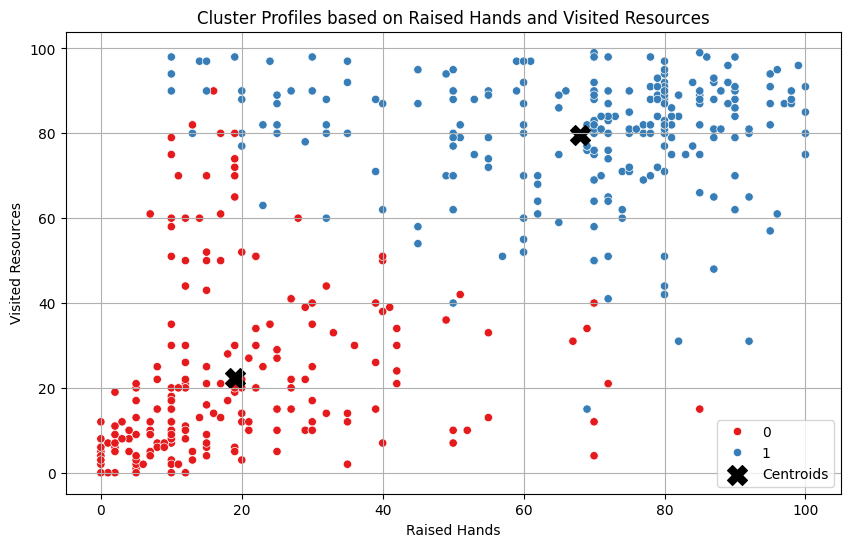

        raisedhands        VisITedResources       
               mean median             mean median
Cluster                                           
0         19.100962   15.0        22.346154   15.0
1         67.937500   72.0        79.613971   82.0


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Visualize cluster profiles
plt.figure(figsize=(10, 6))

# Scatter plot of 'raised hands' vs 'visited resources'
sns.scatterplot(x='raisedhands', y='VisITedResources', hue='Cluster', data=data, palette='Set1', legend='full')

# Plot centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='black', label='Centroids')

plt.title('Cluster Profiles based on Raised Hands and Visited Resources')
plt.xlabel('Raised Hands')
plt.ylabel('Visited Resources')
plt.legend()
plt.grid(True)
plt.show()

# Compare mean or median values of 'raised hands' and 'visited resources' for each cluster
cluster_summary = data.groupby('Cluster')[['raisedhands', 'VisITedResources']].agg(['mean', 'median'])
print(cluster_summary)


## Perception on raised hands over Clustors


In [39]:
pd.crosstab(columns = data['Cluster'], index = data['raisedhands'])

Cluster,0,1
raisedhands,,
0,9,0
1,2,0
2,8,0
3,2,0
4,3,0
...,...,...
96,0,2
97,0,1
98,0,3
